A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends
when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite

The reward is zero on all transitions
except those on which the gambler
reaches his goal, when it is +1.
The state-value function then gives
the probability of winning from each
state. A policy is a mapping from
levels of capital to stakes. The optimal
policy maximizes the probability
of reaching the goal.

In [1]:
import numpy as np
from GamblerEnv import GamblerEnv, MonteCarloAgent
import matplotlib.pyplot as plt

In [2]:
actions = np.arange(100) 
stateValues = np.zeros(shape=101)
policy = np.random.randint(100, size = 101)
policy = np.clip(policy, a_min=0, a_max=np.arange(101))

In [3]:
R = np.zeros(shape=(101, 100))
R[100, :] = 1
pSucces = 0.4

for state in range(101):
    for action in range(100): 
        if action > state:  continue
        succes = np.clip(state + action, a_min=0, a_max=100)
        failure = np.clip(state - action, a_min=0, a_max=100)
        if succes == 100: R[state, action] = 1

In [4]:
def move_all(state, actions, reward):
    resultingStatesSuccess = np.zeros(state+1, dtype=int)
    resultingStatesFailure = np.zeros(state+1, dtype=int)
    rewards = np.zeros(state+1, dtype=int)
    
    for action in actions:
        if action > state:  break
        nextStateSuccess = state + action
        rewards[action] = reward[state, action]
        nextStateSuccess = np.clip(nextStateSuccess, a_min = 0, a_max=100)
        resultingStatesSuccess[action] = nextStateSuccess

        nextStateFailure = state - action
        nextStateFailure = np.clip(nextStateFailure, a_min = 0, a_max=100)
        resultingStatesFailure[action] = nextStateFailure  
    return resultingStatesSuccess, resultingStatesFailure, rewards
    

In [5]:
def valueIteration(stateValues, rewards, actions, discount, theta, n_iter, ph = 0.4, breakTie=False):
    stateVals = stateValues.copy()
    policy = np.zeros(101, dtype=int)
    for i in range(n_iter):
        delta = 0
        for state in reversed(range(1,len(stateValues))):
            currentValue = stateVals[state].copy()
            nextStateWins, nextStateLosses, nextRewardsW = move_all(state, actions, rewards)

            nextStateValuesW = np.take(stateVals, nextStateWins)
            nextStateValuesL = np.take(stateVals, nextStateLosses)

            valuesWin = nextRewardsW + (discount * nextStateValuesW)
            valuesLosses = discount * nextStateValuesL
                
            values = (ph * valuesWin) + ((1- ph) * valuesLosses)

            stateVals[state] = np.max(values)

            if breakTie:
                bestActions = np.flatnonzero(values == np.max(values))
                bestAction = np.random.choice(bestActions) if len(bestActions) > 1 else bestActions[0]
                policy[state] = bestAction
            else:
                policy[state] = np.argmax(values)

            delta = np.max((delta, np.abs(currentValue - stateVals[state])))
        if (i + 1) % 5 == 0: print(f"Iteration {i+1} completed, remaining delta is {delta}")
        if delta <= theta: break
        
    return policy, stateVals


In [6]:
policy, V = valueIteration(stateValues=stateValues, rewards=R, actions=actions, discount=1, theta=0.4, n_iter=200, ph=0.4)

Iteration 5 completed, remaining delta is 0.5264275455999998
Iteration 10 completed, remaining delta is 0.5030366767319343
Iteration 15 completed, remaining delta is 0.4731890669935126
Iteration 20 completed, remaining delta is 0.44497710383794953
Iteration 25 completed, remaining delta is 0.4184498740655318
Iteration 30 completed, remaining delta is 0.3999999999999986


<BarContainer object of 101 artists>

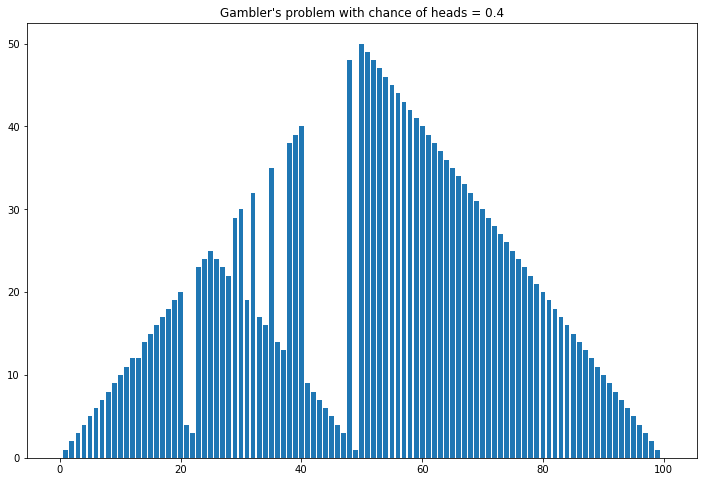

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Gambler's problem with chance of heads = 0.4")
ax.bar(np.arange(101),policy)

In [8]:
policy, V = valueIteration(stateValues=stateValues, rewards=R, actions=actions, discount=1, theta=0.25, n_iter=200, ph=0.25)

Iteration 5 completed, remaining delta is 0.30769824981689453
Iteration 10 completed, remaining delta is 0.25


<BarContainer object of 101 artists>

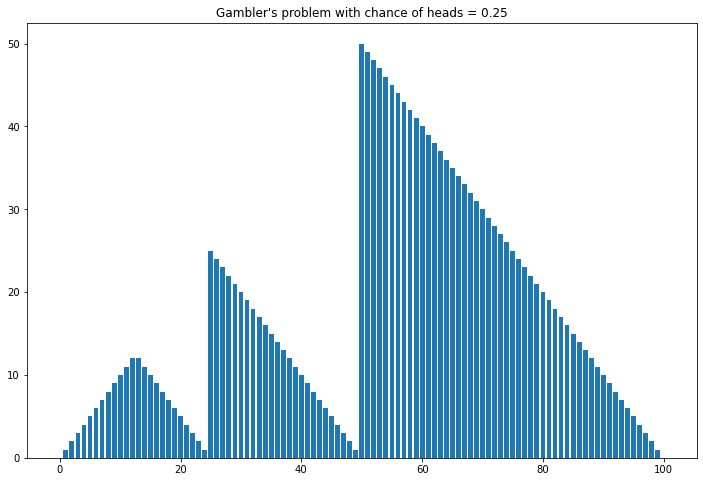

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Gambler's problem with chance of heads = 0.25")
ax.bar(np.arange(101),policy)

In [10]:
policy, V = valueIteration(stateValues=stateValues, rewards=R, actions=actions, discount=1, theta=0.55, n_iter=200, ph=0.55)

Iteration 5 completed, remaining delta is 0.7313533042911136
Iteration 10 completed, remaining delta is 0.7271849274999651
Iteration 15 completed, remaining delta is 0.721658244173156
Iteration 20 completed, remaining delta is 0.7163262551406735
Iteration 25 completed, remaining delta is 0.711271409320787
Iteration 30 completed, remaining delta is 0.7065089511290417
Iteration 35 completed, remaining delta is 0.701940895218776
Iteration 40 completed, remaining delta is 0.6975737261192521
Iteration 45 completed, remaining delta is 0.6936542913376407
Iteration 50 completed, remaining delta is 0.6899945044508939
Iteration 55 completed, remaining delta is 0.6865961036940647
Iteration 60 completed, remaining delta is 0.6833379069852157
Iteration 65 completed, remaining delta is 0.6802245247398915
Iteration 70 completed, remaining delta is 0.6772538484159654
Iteration 75 completed, remaining delta is 0.6744155502905897
Iteration 80 completed, remaining delta is 0.6717231882689347
Iteration 85

<BarContainer object of 101 artists>

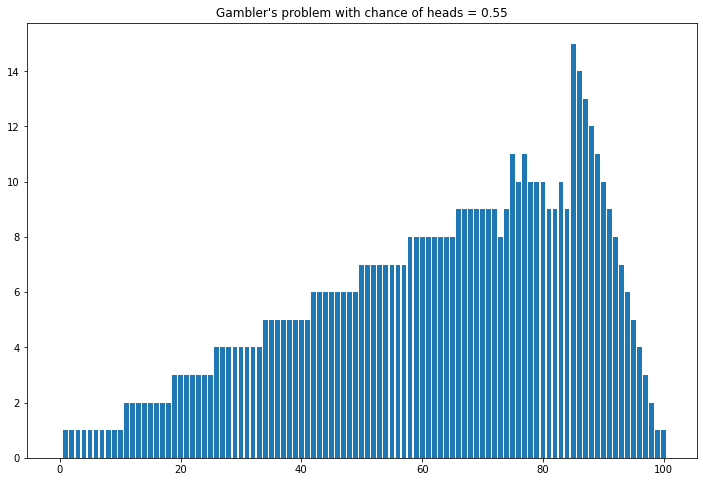

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Gambler's problem with chance of heads = 0.55")
ax.bar(np.arange(101),policy)

In [1]:
import numpy as np
from GamblerEnv import GamblerEnv, MonteCarloAgent
import matplotlib.pyplot as plt

In [2]:
env = GamblerEnv(ph=0.4)
observation = env.reset()
observation

13

In [3]:
agent = MonteCarloAgent(epsilon=0.1)

In [4]:
randomPolicy = np.argmax(agent.policy, axis=1)
randomPolicy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5]:
agent.policy[3, :]

array([0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [6]:
max_games = 100000
observation = env.reset()
iterations = 0

while iterations < max_games:
    action = agent.move(observation)
    observation, reward, terminated = env.step(action)
    agent.observeReward(reward)
    if terminated:
        agent.update()
        observation = env.reset()
        iterations += 1
env.close()

In [7]:
policy = np.argmax(agent.policy, axis=1)
policy

array([ 0,  0,  1,  3,  3,  2,  1,  7,  5,  8, 10,  3,  9, 13, 14, 13, 16,
       13, 11, 10, 12, 21,  5, 14,  5,  3, 26, 27, 24,  0, 12,  9,  4,  3,
       23, 33, 18, 20, 32, 39, 12, 41,  4, 39, 18,  3,  6, 34, 47,  9,  8,
       16, 49, 49, 46, 12, 53, 48, 42, 47, 13,  4, 36, 42, 27, 42, 34, 33,
       19, 40, 30, 14, 18, 10, 30, 10, 10, 29, 52, 25, 24, 20, 20, 17,  1,
       21, 14, 43, 16, 19,  2,  5, 17,  7, 13, 16,  7,  6, 24,  7,  3],
      dtype=int64)

In [8]:
np.sum(policy == randomPolicy)

3

<BarContainer object of 101 artists>

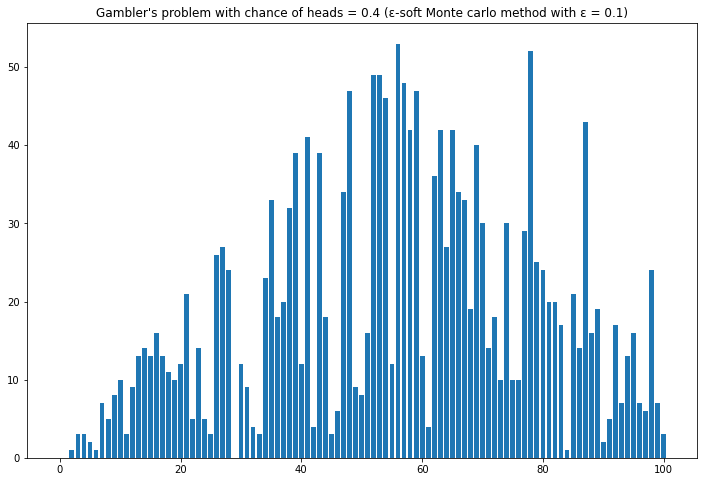

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(f"Gambler's problem with chance of heads = {env.ph} (ε-soft Monte carlo method with ε = {agent.epsilon})")
ax.bar(np.arange(101),policy)

In [40]:
max_games = 100000
env2 = GamblerEnv(ph=0.25)
agent2 = MonteCarloAgent(epsilon=0.01)
observation = env2.reset()
randomPolicy = np.argmax(agent2.policy, axis=1)

iterations = 0

while iterations < max_games:
    action = agent2.move(observation)
    observation, reward, terminated = env2.step(action)
    agent2.observeReward(reward)
    if terminated:
        agent2.update()
        observation = env2.reset()
        iterations += 1
env2.close()

<BarContainer object of 101 artists>

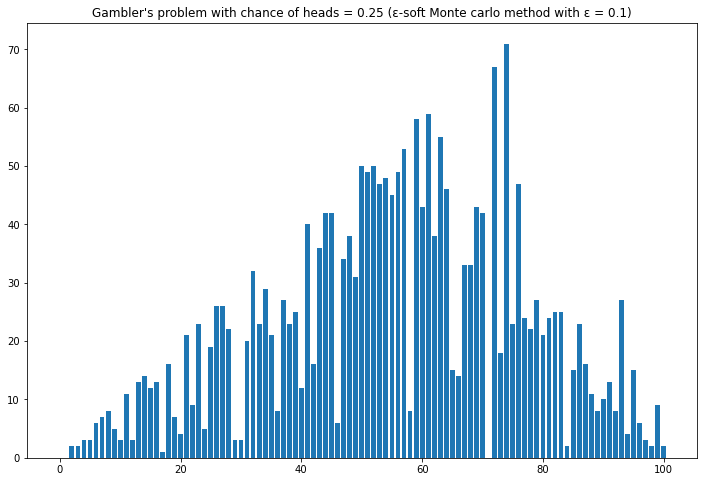

In [11]:
policy = np.argmax(agent2.policy, axis=1)
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(f"Gambler's problem with chance of heads = {env2.ph} (ε-soft Monte carlo method with ε = {agent2.epsilon})")
ax.bar(np.arange(101),policy)

In [12]:
np.sum(randomPolicy == policy)

3

In [13]:
from GamblerEnv import OffPolicyMonteCarloAgent

In [14]:
agent2.policy[1, :]

array([0.95, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [36]:
max_games = 10000
env2 = GamblerEnv(ph=0.25)
agent2_op = OffPolicyMonteCarloAgent(b=agent2.policy, epsilon=0.01)
observation = env2.reset()
randomPolicy = np.argmax(agent2_op.policy, axis=1)

iterations = 0

while iterations < max_games:
    action = agent2_op.move(observation)
    observation, reward, terminated = env2.step(action)
    agent2_op.observeReward(reward)
    if terminated:
        agent2_op.update()
        observation = env2.reset()
        iterations += 1
env2.close()

In [37]:
agent2_op.Q[1, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<BarContainer object of 101 artists>

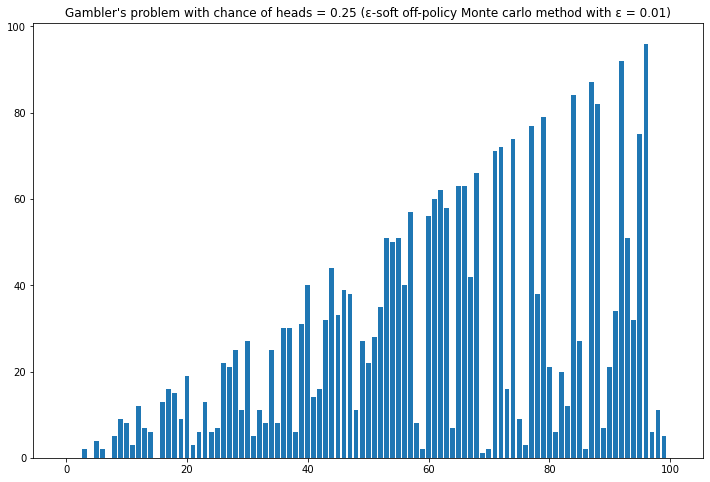

In [38]:
policy = np.argmax(agent2_op.policy, axis=1)
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(f"Gambler's problem with chance of heads = {env2.ph} (ε-soft off-policy Monte carlo method with ε = {agent2_op.epsilon})")
ax.bar(np.arange(101),policy)

In [39]:
np.sum(randomPolicy == policy)

7

In [ ]:
max_games = 10000
env3 = GamblerEnv(ph=0.55)
agent3 = MonteCarloAgent(epsilon=0.25)
observation = env3.reset()
randomPolicy = np.argmax(agent3.policy, axis=1)

iterations = 0

while iterations < max_games:
    action = agent3.move(observation)
    observation, reward, terminated = env3.step(action)
    agent3.observeReward(reward)
    if terminated:
        agent3.update()
        observation = env3.reset()
        iterations += 1
        if (iterations % 1000) == 0: print(f"Iteration {iterations} done")

env3.close()

Iteration 1000 done
Iteration 2000 done
Iteration 3000 done
Iteration 4000 done
Iteration 5000 done
Iteration 6000 done
Iteration 7000 done
Iteration 8000 done
Iteration 9000 done
Iteration 10000 done


<BarContainer object of 101 artists>

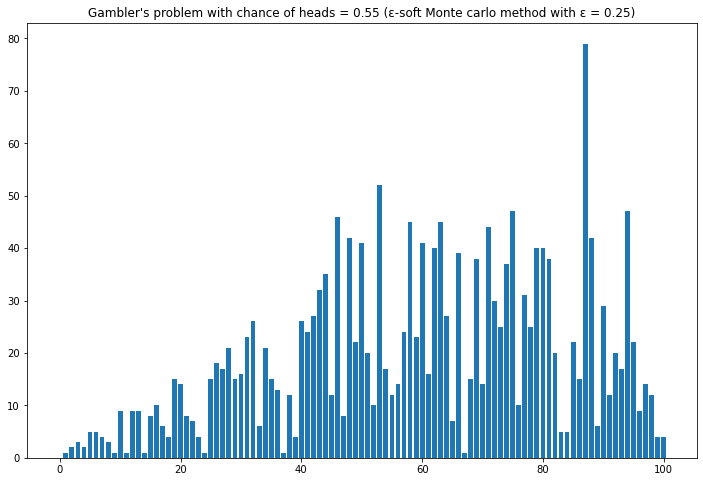

In [ ]:
policy = np.argmax(agent3.policy, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(f"Gambler's problem with chance of heads = {env3.ph} (ε-soft Monte carlo method with ε = {agent3.epsilon})")
ax.bar(np.arange(101),policy)

Issue with the monte-carlo agents:

Imagine this sequence:

1. starting value is 40, random policy dictates that 0 is the action that should be selected
2. (state: 40, action: 0)
3. (state: 40, action: 0)
4. (state: 40, action: 0)
5. (state: 40, action: 0)
6. ...
7. (state: 40, action: 0)
8. (state: 40, action: 23) randomly chosen due to a $\epsilon$-soft policy
9. (state: 63, action: ...)
10. ...
11. (state: 100, action: ...) reward = 1

With an undiscounted first-visit MC-method the action will be rewarded and will likely remain the policy for the forseaable future even though it's a bad choice.